# Titanic
Este dataset contendrá los detalles de un subconjunto de los pasajeros a bordo (891 para ser exactos) del Titanic, lo que es más importante, revelará si sobrevivieron o no. Algunos datos están perdidos, por lo que habrá que realizar un proceso de limpieza.

In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [37]:
titanic_df = pd.read_csv('titanic_dataset.csv')

In [38]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Campos del dataset
- PassengerId: Id único de cada pasajero.
- **Survived**: Determina si un pasajero sobrevivió (1) o no (0). *Este será nuestro conjunto y*
- Pclass: Clase del tiquete.
- Name: Nombre del pasajero.
- Sex: Sexo del pasajero.
- Age: Edad del pasajero.
- SibSp: # de hermanas / cónyuges a bordo del Titanic.
- Parch: # de padres / hijos a bordo del Titanic.
- Ticket: Número del tiquete.
- Fare: Valor pagado por el tiquete.
- Cabin: Indica cubierta donde estaba ubicado el pasajero.
- Embarked: Puerto de embarcación al Titanic.

## Proceso de limpieza y modificación de datos

### Cast de datos de algunas columnas
- Sex
- Embarked

In [39]:
titanic_df['Sex'].replace(['female', 'male'], [0, 1], inplace=True)
titanic_df['Embarked'].replace(['Q', 'S', 'C'], [0, 1, 2], inplace=True)

### Datos vacíos de edad
Se reemplazan por la media de las edades.

In [40]:
age_mean = titanic_df['Age'].mean()
titanic_df['Age'] = titanic_df['Age'].replace(np.nan, age_mean)

### Segmentos de edades a un solo valor
Se reemplazan los segmentos tipo 8-15 por un solo valor.

In [41]:
bins = [0, 8, 15, 18, 25, 40, 60, 100]
values = ['1', '2', '3', '4', '5', '6', '7']
titanic_df['Age'] = pd.cut(titanic_df['Age'], bins, labels=values)

### Eliminación columnas
- Se elimina la columna Cabin puesto que tiene muchos datos perdidos.
- Se elimina la columna Name porque no influye en el análisis.
- Se elimina la columna Ticket porque no influye en el análisis.
- Se elimina la columna PassengerId porque no influye en el análisis.

In [42]:
print('Datos perdidos = ' + str(titanic_df['Cabin'].isnull().sum()))

Datos perdidos = 687


In [43]:
titanic_df.drop(['Cabin'], axis=1, inplace=True)
titanic_df.drop(['Name'], axis=1, inplace=True)
titanic_df.drop(['Ticket'], axis=1, inplace=True)
titanic_df.drop(['PassengerId'], axis=1, inplace=True)

### Eliminación filas
Se eliminan las filas con valores vacíos.

In [44]:
titanic_df.dropna(axis=0, how='any', inplace=True)

## Información básica del dataset

In [45]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    int64   
 1   Pclass    889 non-null    int64   
 2   Sex       889 non-null    int64   
 3   Age       889 non-null    category
 4   SibSp     889 non-null    int64   
 5   Parch     889 non-null    int64   
 6   Fare      889 non-null    float64 
 7   Embarked  889 non-null    float64 
dtypes: category(1), float64(2), int64(5)
memory usage: 56.8 KB


### Columnas

0      4
1      5
2      5
3      5
4      5
      ..
886    5
887    4
888    5
889    5
890    5
Name: Age, Length: 889, dtype: category
Categories (7, object): ['1' < '2' < '3' < '4' < '5' < '6' < '7']
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


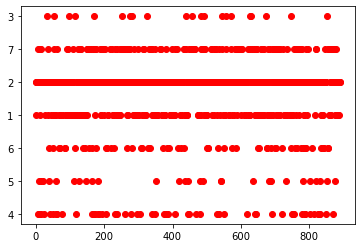

In [48]:
titanic_df.columns
print(titanic_df['Age'])
print(titanic_df['Survived'])
plt.plot(titanic_df['Age'],'ro')

### Shape

In [312]:
print('Shape: ' + str(titanic_df.shape))

Shape: (889, 8)


### Algunos datos estadísticos
Solo de las columnas numéricas

In [313]:
titanic_df.describe()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,0.524184,0.382452,32.096681,1.102362
std,0.486260,0.834700,0.477538,1.103705,0.806761,49.697504,0.515181
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,8.000000,6.000000,512.329200,2.000000


# Machine Learning

In [314]:
from sklearn.model_selection import train_test_split
#Métodos
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#Reportes
from sklearn.metrics import classification_report, accuracy_score, precision_score
from sklearn.metrics import confusion_matrix, f1_score, mean_squared_error
#Tiempo
import time

## Separación X y y

In [315]:
X = np.array(titanic_df.drop(['Survived'], 1))
y = np.array(titanic_df['Survived'])

In [316]:
print(X.shape)
print(y.shape)

(889, 7)
(889,)


Se separan los datos en train y test.

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [318]:
print(X_train.shape)
print(X_test.shape)

(622, 7)
(267, 7)


## Regresión logística

In [319]:
start = time.time()

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

end = time.time()
time_ml = end - start

### Métricas

In [320]:
def metricas (X_train, y_train, y_test, y_pred, time_ml):
    print('Tiempo de ejecución = ' + str(time_ml))
    print('\n')
    print('Matriz de confusión')
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print('Score train = ' + str(log_reg.score(X_train, y_train)))
    print('\n')
    print('Accuracy test = ' + str(accuracy_score(y_test, y_pred)))
    print('Precision test = ' + str(precision_score(y_test, y_pred)))
    print('Sensivity test = ' + str(tp/(tp+fn)))
    print('Specificity test = ' + str(tn/(tn+fp)))

    print('F1 Score = ' + str(f1_score(y_test, y_pred)))
    print('Mean Squared Error = ' + str(mean_squared_error(y_test, y_pred)))


In [321]:
metricas(X_train, y_train, y_test, y_pred, time_ml)

Tiempo de ejecución = 0.03560972213745117


Matriz de confusión
[[136  21]
 [ 34  76]]


Score train = 0.8263665594855305


Accuracy test = 0.7940074906367042
Precision test = 0.7835051546391752
Sensivity test = 0.6909090909090909
Specificity test = 0.8662420382165605
F1 Score = 0.7342995169082126
Mean Squared Error = 0.20599250936329588


## Support Vector Machines

In [324]:
start = time.time()

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

end = time.time()
time_ml = end - start

In [325]:
metricas(X_train, y_train, y_test, y_pred, time_ml)

Tiempo de ejecución = 0.01334691047668457


Matriz de confusión
[[139  18]
 [ 81  29]]


Score train = 0.8263665594855305


Accuracy test = 0.6292134831460674
Precision test = 0.6170212765957447
Sensivity test = 0.2636363636363636
Specificity test = 0.8853503184713376
F1 Score = 0.36942675159235666
Mean Squared Error = 0.3707865168539326


## K Neighbors

In [326]:
start = time.time()

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

end = time.time()
time_ml = end - start

In [327]:
metricas(X_train, y_train, y_test, y_pred, time_ml)

Tiempo de ejecución = 0.012796878814697266


Matriz de confusión
[[122  35]
 [ 35  75]]


Score train = 0.8263665594855305


Accuracy test = 0.7378277153558053
Precision test = 0.6818181818181818
Sensivity test = 0.6818181818181818
Specificity test = 0.7770700636942676
F1 Score = 0.6818181818181818
Mean Squared Error = 0.26217228464419473


## Random Forest

In [328]:
start = time.time()

rfm = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1, random_state=101, max_features = None, min_samples_leaf = 30)
rfm.fit(X_train, y_train)
y_pred=rfm.predict(X_test)

end = time.time()
time_ml = end - start

In [329]:
metricas(X_train, y_train, y_test, y_pred, time_ml)

Tiempo de ejecución = 0.11899662017822266


Matriz de confusión
[[140  17]
 [ 46  64]]


Score train = 0.8263665594855305


Accuracy test = 0.7640449438202247
Precision test = 0.7901234567901234
Sensivity test = 0.5818181818181818
Specificity test = 0.89171974522293
F1 Score = 0.6701570680628272
Mean Squared Error = 0.23595505617977527


## SGD

In [330]:
start = time.time()

sgd =  SGDClassifier(loss='modified_huber', shuffle=True,random_state=101)
sgd.fit(X_train, y_train)
y_pred=sgd.predict(X_test)

end = time.time()
time_ml = end - start

In [331]:
metricas(X_train, y_train, y_test, y_pred, time_ml)

Tiempo de ejecución = 0.008031129837036133


Matriz de confusión
[[141  16]
 [ 67  43]]


Score train = 0.8263665594855305


Accuracy test = 0.6891385767790262
Precision test = 0.7288135593220338
Sensivity test = 0.39090909090909093
Specificity test = 0.8980891719745223
F1 Score = 0.5088757396449705
Mean Squared Error = 0.31086142322097376


# /-----------------------------------------------------------------------------------------------------------/

# Predicciones

In [336]:
test_df = pd.read_csv('test.csv')

test_df['Sex'].replace(['female', 'male'], [0, 1], inplace=True)
test_df['Embarked'].replace(['Q', 'S', 'C'], [0, 1, 2], inplace=True)
age_mean = test_df['Age'].mean()
test_df['Age'] = test_df['Age'].replace(np.nan, age_mean)

bins = [0, 8, 15, 18, 25, 40, 60, 100]
values = ['1', '2', '3', '4', '5', '6', '7']
test_df['Age'] = pd.cut(test_df['Age'], bins, labels=values)

test_df.drop(['Cabin'], axis=1, inplace=True)
test_df.drop(['Name'], axis=1, inplace=True)
test_df.drop(['Ticket'], axis=1, inplace=True)

test_df.dropna(axis=0, how='any', inplace=True)

In [337]:
ids = test_df['PassengerId']
pred_x = test_df.drop('PassengerId', axis=1)

### Predicción Regresión Logística

In [338]:
pred_log_reg = log_reg.predict(pred_x)
out_log_reg = pd.DataFrame({'PassengerId': ids, 'Survived': pred_log_reg})
out_log_reg.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


### Predicción SVC 

In [340]:
pred_svc = svc.predict(pred_x)
out_svc = pd.DataFrame({'PassengerId': ids, 'Survived': pred_svc})
out_svc.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


### Predicción KNN

In [341]:
pred_knn = knn.predict(pred_x)
out_knn = pd.DataFrame({'PassengerId': ids, 'Survived': pred_knn})
out_knn.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,1
8,900,1
9,901,0


### Predicción Random Forest

In [345]:
pred_rfm = rfm.predict(pred_x)
out_rfm = pd.DataFrame({'PassengerId': ids, 'Survived': pred_rfm})
out_rfm.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


### Predicción SGD

In [346]:
pred_sgd = sgd.predict(pred_x)
out_sgd = pd.DataFrame({'PassengerId': ids, 'Survived': pred_sgd})
out_sgd.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
